In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Para empezar esta actividad, realizamos los mismos pasos que en la actividad 3 para crear nuestro DataFrame con la informaciòn de la estaciòn meteorologìca.
#Creamos nuestro DataFrame inicial leyendo el archivo de datos desde el repositoria de github.
url = "https://raw.githubusercontent.com/OscarAngul0/FisicaComputacional1/master/Actividad1/25015.txt"
#CREAMOS NUESTRO DATA FRAME
my_col = ["Fecha","Precip","Evap","T_Max","T_min"]
df_data = pd.read_csv(url, names=my_col, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
#url es la direccion del archivo, names nos da nombres a las columnas, enncoding le dice a python que el archivo tienes caracteres en español. sep es el formato de separacion de datos. header son comentarios al principio del archivo
#verificamos que el dataframe se haya creado correctamente
#print (df_data.head(), df_data.tail())
str_Nulo = 'Nulo'
df_data1 = df_data.replace(to_replace=str_Nulo, value='', regex=True)
#convertimos la informacion a numeros flotantes
cols1 = ['Precip', 'Evap', 'T_Max', 'T_min']
for cols in cols1:
  df_data1[cols] = pd.to_numeric(df_data1[cols], errors='coerce')
  #verificamos cuantos datos nulos hay
df_data1.isnull().sum() 
#vemos que casi no faltan datos en relacion al numero de dias donde tenemos mediciones
#hacemos estadistica
df_data1.describe()
#trabajamos la columa de las fechas
df_data2=df_data1.copy()
df_data2["Fecha"] = pd.to_datetime(df_data2["Fecha"], dayfirst=True)
 #print (df_data2.head())
df_data2.dtypes
#Agregamos 2 nuevas columnas poara denotar el año y el mes, esto se hace para facilitar el filtrado de informacion +adelante
df_data2["Año"]=df_data2["Fecha"].dt.year
df_data2["Mes"]=df_data2["Fecha"].dt.month
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes en unavariable de tipo caracter
df_data2.drop('Mes', axis=1, inplace=True) #inplace=true hace que los cambios en esa columnna se hagan directamente sobre el dataframe original.
df_data2['Mes'] = df_data2['Fecha'].dt.strftime('%b')
print (df_data2.info())
print (df_data2.head(), df_data2.tail())
print (df_data2.dtypes)
#Nos aseguramos que el data frame, contenga los datos del tipo correcto
print (df_data2.shape)
print (df_data2.describe)
df_data1.isnull().sum() 
#Obtenemos la informacion general de nuestro DataFrame, asi completando lo necesario para comenzar con el analisis exploratorio de datos 

#PARTE 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21266 entries, 0 to 21265
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21266 non-null  datetime64[ns]
 1   Precip  21237 non-null  float64       
 2   Evap    20900 non-null  float64       
 3   T_Max   21190 non-null  float64       
 4   T_min   21179 non-null  float64       
 5   Año     21266 non-null  int64         
 6   Mes     21266 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
       Fecha  Precip  Evap  T_Max  T_min   Año  Mes
0 1961-01-01     0.0   2.9   22.0   10.5  1961  Jan
1 1961-01-02     0.0   2.7   25.0    9.0  1961  Jan
2 1961-01-03     0.0   3.7   29.0   10.0  1961  Jan
3 1961-01-04     0.0   2.5   22.0   13.0  1961  Jan
4 1961-01-05     0.0   1.1   24.0   14.0  1961  Jan            Fecha  Precip  Evap  T_Max  T_min   Año  Mes
21261 2019-04-26     0.0   6.9   36.0   16

Fecha       0
Precip     29
Evap      366
T_Max      76
T_min      87
dtype: int64

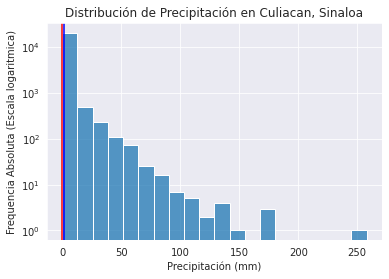

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#HISTOGRAMA CON MATPLOTLIB USANDO ESCALA LOGARITMICA
#plt.hist(df_data2.Precip, bins=20)
#plt.yscale("log")
#plt.xlabel('Precipitación (mm)')
#plt.ylabel('Frequencia Absoluta')
#plt.title('Distribución de Precipitación en Culiacan, Sinaloa')
#plt.grid()
#plt.show()
#CREAMOS NUESTRO HISTOGRAMA DE LA PRECIPITACION 
p_med = df_data2.Precip.median() 
p_prom = df_data2.Precip.mean()
plt.axvline(p_med, color = 'r'); 
plt.axvline(p_prom, color = 'b');
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta (Escala logaritmica)')
plt.title('Distribución de Precipitación en Culiacan, Sinaloa')
sns.histplot(data=df_data2, x='Precip', bins=20, log_scale=(False,True));



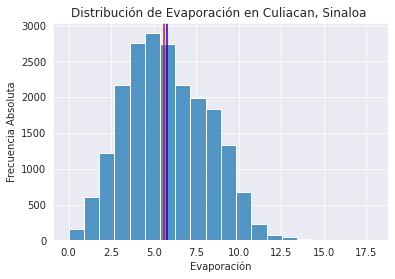

In [25]:
#CREAMOS EL HISTOGRAMA DE LA DISTRIBUCION DE EVAPORACION
Ev_med = df_data2.Evap.median() 
Ev_prom = df_data2.Evap.mean()
plt.axvline(Ev_med, color = 'r'); 
plt.axvline(Ev_prom, color = 'b');
plt.xlabel ("Evaporación")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Evaporación en Culiacan, Sinaloa ")
sns.histplot(data=df_data2, x='Evap', bins=20)

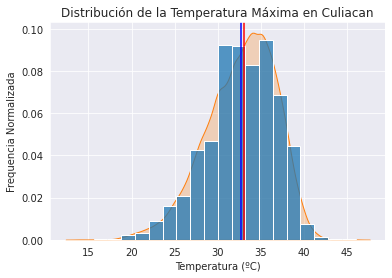

In [22]:
#CREAMOS LOS HISTOGRAMAS DE TEMPERATURA MAXIMA Y MINIMA COMPLEMENTADOS CON SU FUNCION DE DENSIDAD DE PROBABILIDAD
tmed= df_data2.T_Max.median()
tprom= df_data2.T_Max.mean()

sns.histplot(data=df_data2, x='T_Max', bins=20, stat='density');
sns.kdeplot(df_data2.T_Max, fill=True);

plt.axvline(tmed, color = 'r'); 
plt.axvline(tprom, color = 'b');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Culiacan')

plt.show()

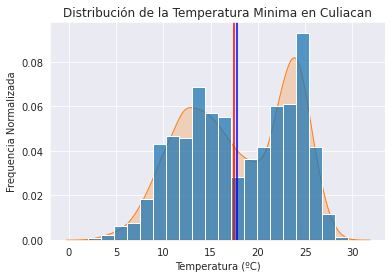

In [24]:
tmed2= df_data2.T_min.median()
tprom2= df_data2.T_min.mean()

sns.histplot(data=df_data2, x='T_min', bins=20, stat='density');
sns.kdeplot(df_data2.T_min, fill=True);

plt.axvline(tmed2, color = 'r'); 
plt.axvline(tprom2, color = 'b');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Minima en Culiacan')

plt.show()

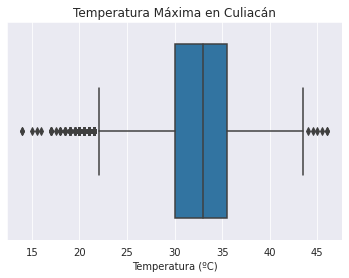

In [33]:
#CREAMOS LAS BOXPLOT PARA LA EVAPORACION Y TEMPERATURA MAXIMA Y MINIMA
sns.boxplot(x=df_data2.T_Max, data=df_data2, orient='h').set(xlabel='Temperatura (ºC)',title='Temperatura Máxima en Culiacán');


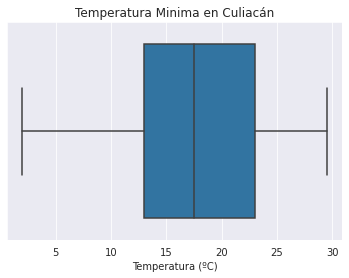

In [34]:
sns.boxplot(x=df_data2.T_min, data=df_data2, orient='h').set(xlabel='Temperatura (ºC)',title='Temperatura Minima en Culiacán');

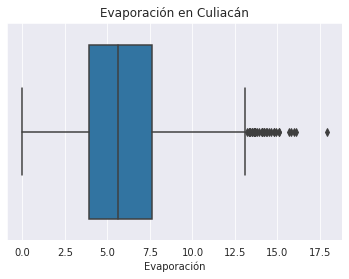

In [35]:
#BOXPLOT PARA LA EVAPORACION
sns.boxplot(x=df_data2.Evap, data=df_data2, orient='h').set(xlabel='Evaporación',title='Evaporación en Culiacán');

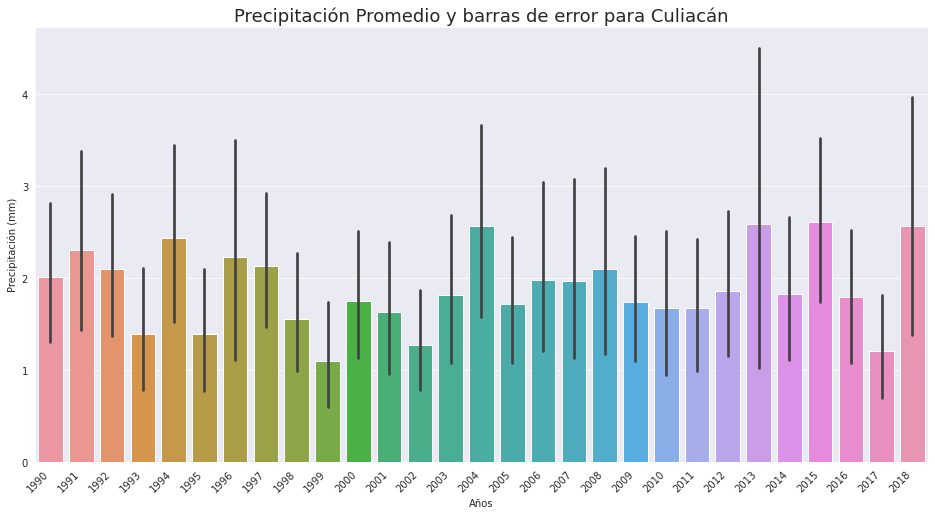

In [39]:
#A CONTINUACION CONSTRUIMOS LAS GRAFICAS DE BARRAS SOLCIITADAS
#SECCIONAMOS NUESTRO DATAFRAME  
df_60 = df_data2[(df_data2['Año'] >= 1960) & (df_data2['Año'] < 1990)]
df_90 = df_data2[(df_data2['Año'] >= 1990) & (df_data2['Año'] < 2019)]
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# ROTACION EN LOS TITULOS DE LAS BARRAS EN LE EJE X
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Culiacán', fontsize=18)

plt.show()

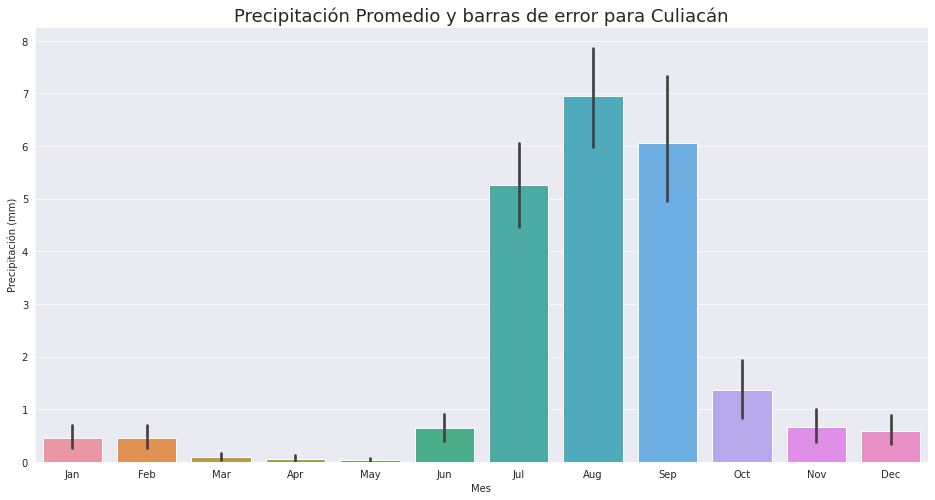

In [41]:
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Culiacán', fontsize=18)

plt.show()

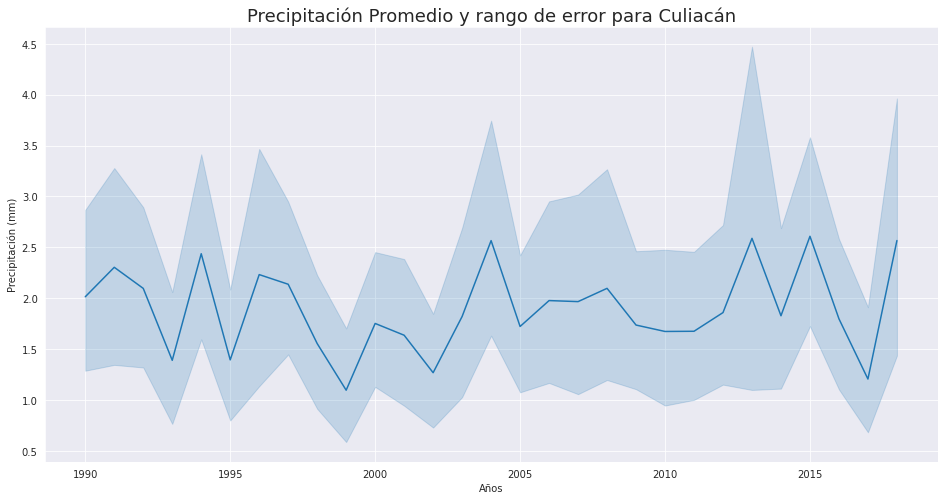

In [42]:
#AHORA CREAMOS GRAFICAS DE LINEAS 
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);


plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Culiacán', fontsize=18)

plt.show()

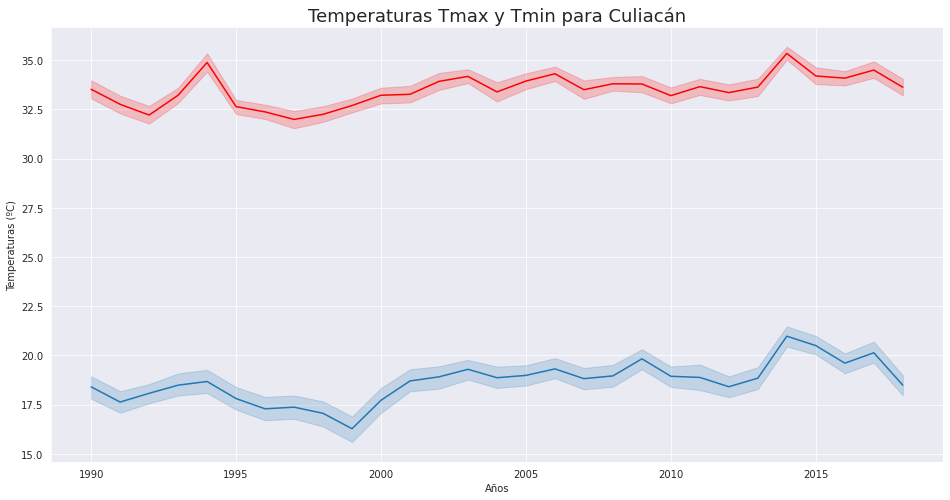

In [47]:
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='T_Max', data=df_90, color='r');
sns.lineplot(x='Año', y='T_min', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Culiacán', fontsize=18)

plt.show()

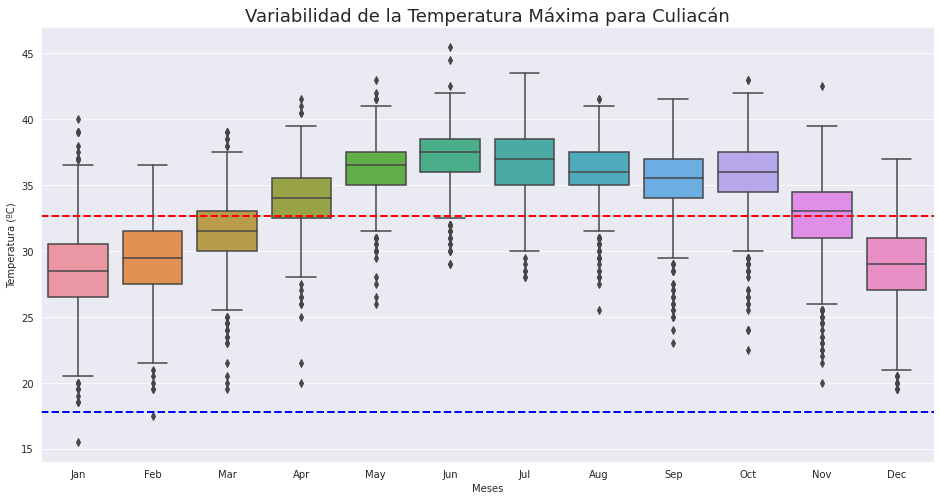

mean(Tmax) =  32.652609721566776
mean(Tmin) =  17.78157136786439
Diff Tmax_ave-Tmin_ave =  14.871038353702385


In [48]:
plt.figure(figsize=(16,8))

Tmax_ave = df_data2.T_Max.mean()
Tmin_ave = df_data2.T_min.mean()

# BOXPLOT DE TEMPERATURA MAX
g=sns.boxplot(x='Mes', y='T_Max', data=df_90);
# LINEAS DE PROMEDIOS 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);


plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Culiacán', fontsize=18)

plt.show()




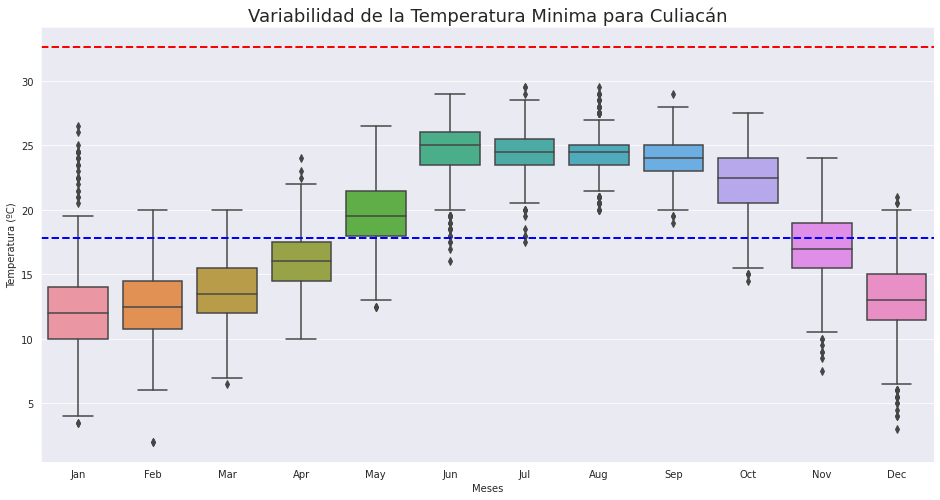

In [51]:

# BOXPLOT TEMPERATURA MINIMA
plt.figure(figsize=(16,8))
g=sns.boxplot(x='Mes', y='T_min', data=df_90);
# LINEAS DE PROMEDIOS
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Minima para Culiacán', fontsize=18)

plt.show()

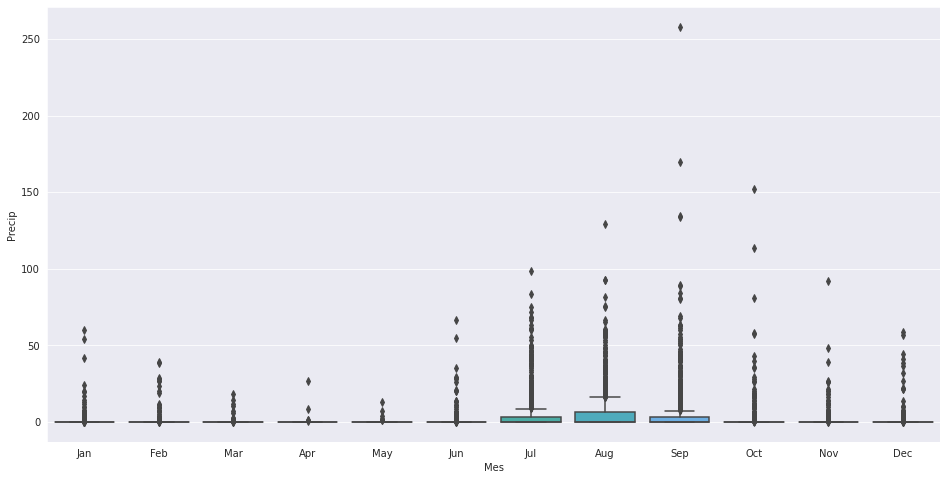

In [53]:
#BOXPLOT DE PRECIPITACION POR MES
plt.figure(figsize=(16,8))
sns.boxplot(x='Mes' , y='Precip', data=df_90);
#la boxplot identifica muchos datos atipicos en la precipitacion.